# Estimadores de máxima verosimilitud

![MLE](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/MLfunctionbinomial-en.svg/600px-MLfunctionbinomial-en.svg.png)

> La estimación por máxima verosimilitud (maximum likelihood estimation - MLE) es uno de los métodos más utilizados para estimar los parámetros de un modelo probabilístico.

> La idea básica, es elegir los parámetros que maximizan la función de verosimilitud. Intuitivamente, esto corresponde a elegir los parámetros que maximizan la probabilidad de los datos observados.

> **Objetivos:**
> - Comprender el principio de máxima verosimilitud a través de ejemplos básicos.
> - Estimar los parámetros de algunas distribuciones comunes usando el principio de máxima verosimilitud.
> - Entender las limitaciones básicas de los estimadores de máxima verosimilitud.

Referencia:

- http://www.cs.toronto.edu/~rgrosse/csc321/probabilistic_models.pdf

## 0. Introducción

Suponga que tenemos una secuencia de datos $x_1, \dots, x_n$ que sabemos que provienen de una distribución exponencial. La pregunta es: **¿De cuál distribución exponencial vienen los datos?**

Ya hemos hablado de algunas distribuciones, como la binomial, la exponencial, la normal, etcétera. De hecho, lo que llamamos distribución exponencial $\text{Exponential}(\lambda)$ no es una sola distribución sino una familia de distribucions parametrizadas por el parámetro $\lambda$.

Es decir, cada valor de $\lambda$ define una distribución dentro de la familia, con pdf $p(x) = \lambda e^{-\lambda x}$. Esto se extiende a las demás distribuciones que hemos estudiado.

Ahora, es común que nos enfrentemos a la situación de tener datos aleatorios de los que sabemos (o creemos) que provienen de una distribución paramétrica, cuyos parámetros desconocemos. En este caso queremos utilizar los datos para estimar (o inferir) el valor del (de los) parámetro(s).

En clases anteriores, nos concentrábamos en obtener la probabilidad de obtener cierto dato a partir de algún modelo paramétrico con parámetros conocidos. Ahora, en estadística inferencial, le damos la vuelta: estimaremos la probabilidad de los parámetros dados un modelo y datos observados.

## 1. Principios básicos

### 1.1. Principio de máxima verosimilitud

**Retomamos el ejemplo de la moneda**.

De clases pasadas, sabemos que el experimento de tirar la moneda $n$ veces y contar el número de caras, sigue una distribución $\text{Binomial}(n,\theta)$, con pmf

$$
p(a) = \left(\begin{array}{c}n \\ a \end{array}\right) \theta^a (1 - \theta)^{n-a}
$$

donde $a$ es el número de caras.

En un ejemplo concreto, supongamos que se tiró la moneda 100 veces y contamos 55 caras. Por tanto, sabemos que

$$
p(55) = \left(\begin{array}{c}100 \\ 55\end{array}\right) \theta^{55}(1 - \theta)^{45}
$$

Observamos que la probabilidad de obtener 55 caras depende del valor de $\theta$, por lo que es usual incluir esto con la notación de probabilidad condicional:

$$
p(55 | \theta) = \left(\begin{array}{c}100 \\ 55\end{array}\right) \theta^{55}(1 - \theta)^{45}
$$

Lo anterior, lo podemos leer como: "la probabilidad de obtener 55 caras dado que la probabilidad de cara en un tiro individual es $\theta$".

Algunos términos estándar que usamos en estadística:

- **Experimento**: Tirar la moneda 100 veces y contar el número de caras.

- **Datos**: Los datos son el resultado del experimento. En este caso son las 55 caras.

- **Parámetros de interés**: Estamos interesados en conocer el valor del parámetro $\theta$.

- **(Función de) Verosimilitud**: Es la función $p(datos | parámetros)$. Notemos que es una función tanto de los datos, como de los parámetros. En nuestro caso es
  $$
  p(55 | \theta) = \left(\begin{array}{c}100 \\ 55\end{array}\right) \theta^{55}(1 - \theta)^{45}.
  $$

Por tanto, una idea razonable es encontrar los parámetros de modo que la Verosimilitud sea máxima (que se maximice la probabilidad de los datos observados).

**Definición.** Dado un conjunto de datos, el estimador de máxima verosimilitud (MLE por sus siglas en inglés) para los parámetros, son los valores de los parámetros que maximizan la verosimilitud $p(datos | parámetros)$.

**Ejemplo:**

Para el problema en cuestión, queremos maximizar la versolimilitud 

$$
p(55 | \theta) = \left(\begin{array}{c}100 \\ 55\end{array}\right) \theta^{55}(1 - \theta)^{45}.
$$

Para esto usamos nociones de cálculo:

<details>
<summary>Descubrir</summary>

$$
\frac{d}{d\theta} p(55 | \theta) = \left(\begin{array}{c}100 \\ 55\end{array}\right) \left(55\theta^{54}(1 - \theta)^{45} - 45\theta^{55}(1 - \theta)^{44}\right)
$$

Igualando a cero:

$$
\begin{align} \nonumber
55\theta^{54}(1 - \theta)^{45} = 45\theta^{55}(1 - \theta)^{44} \\ \nonumber
55(1 - \theta) = 45\theta \\ \nonumber
55 = 100 \theta
\end{align}
$$

Por lo que el MLE es $\hat{\theta} = \frac{55}{100}$.
</details>

Comentarios:

1. Esto coincide con la intuición. El MLE para $\theta$ resulta ser la fracción de caras que tenemos en nuestros datos.

2. Para verificar que lo anterior es un máximo, podemos aplicar un criterio de segunda derivada. Otra opción, dado que tenemos un problema en un dominio cerrado $0 \leq \theta \leq 1$, podemos evaluar en los extremos:
   - $p(55 | \theta=0) = p(55 | \theta=1) = 0$
   
   y en el punto crítico:

In [33]:
# Importamos librería math (función math.comb)
import math

In [34]:
math.comb?

Signature: math.comb(n, k, /)
Docstring:
Number of ways to choose k items from n items without repetition and without order.

Evaluates to n! / (k! * (n - k)!) when k <= n and evaluates
to zero when k > n.

Also called the binomial coefficient because it is equivalent
to the coefficient of k-th term in polynomial expansion of the
expression (1 + x)**n.

Raises TypeError if either of the arguments are not integers.
Raises ValueError if either of the arguments are negative.
Type:      builtin_function_or_method

In [35]:
def verosimilitud_binomial(n, a, theta):
    """Función que calcula la verosimilitud de una distribución binomial.
    
    Parámetros:
    n : int : número de ensayos
    a : int : número de éxitos
    theta : float : probabilidad de éxito en cada ensayo
    
    Retorna:
    float : valor de la función de verosimilitud
    """
    coeficiente_binomial = math.comb(n, a)
    L = coeficiente_binomial * (theta ** a) * ((1 - theta) ** (n - a))
    return L

In [36]:
# Evaluamos en el punto crítico
verosimilitud_binomial(100, 55, 0), verosimilitud_binomial(100, 55, 55/100), verosimilitud_binomial(100, 55, 1)

(0, 0.07998750025326716, 0)

Con esto concluimos que el único máximo es el que encontramos.

Veamos como luce la función de verosimilitud para casos como el de la moneda:

In [37]:
# Importamos numpy
import numpy as np
# Importamos matplotlib.pyplot
import matplotlib.pyplot as plt

In [38]:
# Calculamos la función de verosimilitud con los datos del ejemplo
# Parámetros - 100 tiros - 55 caras
# Función de verosimilitud
theta = np.linspace(0, 1, 1001)
verosimilitud = verosimilitud_binomial(100, 55, theta)


In [39]:
# Aproximamos el valor máximo de la verosimilitud
theta_MLE = theta[np.argmax(verosimilitud)]

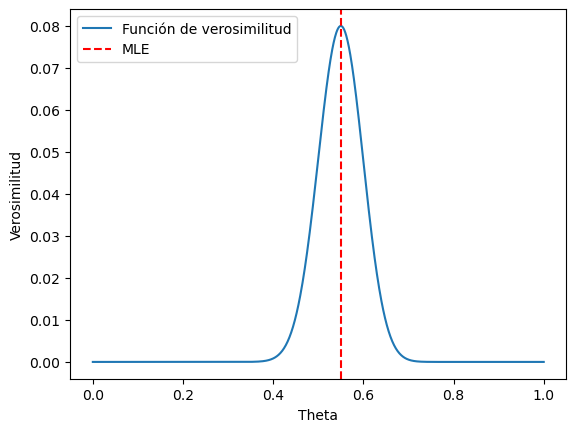

In [40]:
# Dibujamos la función de verosimilitud
plt.plot(theta, verosimilitud, label='Función de verosimilitud')
plt.axvline(theta_MLE, color='red', linestyle='--', label='MLE')
plt.xlabel('Theta')
plt.ylabel('Verosimilitud')
plt.legend()
plt.show()

¿Qué pasaría en un caso de 1000 tiros con 550 caras?

Veamos:

In [41]:
# Calculamos la función de verosimilitud con los datos del ejemplo
# Parámetros - 1000 tiros - 550 caras
# Función de verosimilitud
verosimilitud2 = verosimilitud_binomial(1000, 550, theta)

In [42]:
# Aproximamos el valor máximo de la verosimilitud
theta_MLE2 = theta[np.argmax(verosimilitud2)]

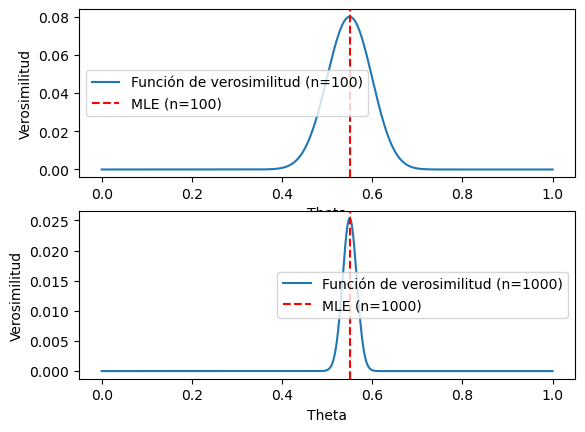

In [43]:
# Dibujamos las funcines de verosimilitud
plt.subplot(2, 1, 1)
plt.plot(theta, verosimilitud, label='Función de verosimilitud (n=100)')
plt.axvline(theta_MLE, color='red', linestyle='--', label='MLE (n=100)')
plt.xlabel('Theta')
plt.ylabel('Verosimilitud')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(theta, verosimilitud2, label='Función de verosimilitud (n=1000)')
plt.axvline(theta_MLE2, color='red', linestyle='--', label='MLE (n=1000)')
plt.xlabel('Theta')
plt.ylabel('Verosimilitud')
plt.legend()

Aunque el MLE en ambos casos es el mismo, porque

$$
\frac{550}{1000} = \frac{55}{100},
$$

observamos que la dispersión de la función de verosimilitud al rededor del máximo en el caso de más tiros es menor.

¿En cuál de los dos valores estimados $\hat{\theta}$ confías más?

### 1.2. Log-verosimilitud

Comúnmente hacemos la suposición de que los datos son independientes e idénticamente distribuidos (iid), lo cual trae la implicación que la función de verosimilitud sea un producto de las verosimilitudes individuales de los datos. Ahora, dado que estamos interesados en maximizar la verosimilitud, hay que tener en cuenta que maximizar productos de funciones puede tornarse bastante complejo.

Es en este punto donde nos podemos dar cuenta que la función $\log$ (logaritmo natural o logaritmo en base $e$) puede ser de gran ayuda, dado que convierte productos en sumas. El logaritmo de la función de verosimilitud se conoce como **log-verosimilitud**, y dado que $\log(x)$ es una función creciente, el máximo de la verosimilitud y la log-verosimilitud se encuentran en el mismo punto.

**Ejemplo.** Retomando el caso de la moneda, tenemos que la log-verosimilitud es:

$$
\log p(55 | \theta) = \log \left(\left(\begin{array}{c}100 \\ 55\end{array}\right)\right) + 55 \log \theta + 45 \log (1 - \theta).
$$

Ahora, para maximizar la log-verosimilitud:

<details>
<summary>Descubrir</summary>

$$
\frac{d}{d\theta} \log p(55 | \theta) = \frac{55}{\theta} - \frac{45}{1 - \theta}
$$

Igualando a cero:

$$
\begin{align} \nonumber
\frac{55}{\theta} - \frac{45}{1 - \theta} \\ \nonumber
55(1 - \theta) = 45\theta \\ \nonumber
55 = 100 \theta
\end{align}
$$

Por lo que el MLE es $\hat{\theta} = \frac{55}{100}$.
</details>

Veamos como luce la función de log-verosimilitud en este caso y comparémosla con la función de verosimilitud:

In [44]:
def log_verosimilitud_binomial(n, a, theta):
    """Función que calcula el logaritmo de la verosimilitud de una distribución binomial.
    
    Parámetros:
    n : int : número de ensayos
    a : int : número de éxitos
    theta : np.array : probabilidad de éxito en cada ensayo
    
    Retorna:
    float : valor del logaritmo de la función de verosimilitud
    """
    log_L = np.log(float(math.comb(n, a))) + a * np.log(theta) + (n - a) * np.log(1 - theta)
    return log_L

In [45]:
# Calculamos la función de verosimilitud con los datos del ejemplo
# Función de verosimilitud
verosimilitud = verosimilitud_binomial(100, 55, theta)
# Función de log-verosimilitud
log_verosimilitud = log_verosimilitud_binomial(100, 55, theta)

C:\Users\esjim\AppData\Local\Temp\ipykernel_18292\288510726.py:12: RuntimeWarning: divide by zero encountered in log
  log_L = np.log(float(math.comb(n, a))) + a * np.log(theta) + (n - a) * np.log(1 - theta)


In [46]:
# Aproximamos el máximo de la log-verosimilitud
theta_MLE = theta[np.argmax(log_verosimilitud)]

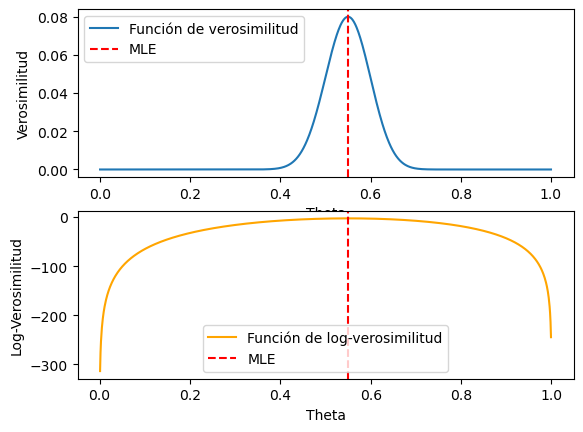

In [47]:
# Dibujamos las funciones de log-verosimilitud y verosimilitud
plt.subplot(2, 1, 1)
plt.plot(theta, verosimilitud, label='Función de verosimilitud')
plt.axvline(theta_MLE, color='red', linestyle='--', label='MLE')
plt.xlabel('Theta')
plt.ylabel('Verosimilitud')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(theta, log_verosimilitud, label='Función de log-verosimilitud', color='orange')
plt.axvline(theta_MLE, color='red', linestyle='--', label='MLE')
plt.xlabel('Theta')
plt.ylabel('Log-Verosimilitud')
plt.legend()

## 2. Máxima verosimilitud para distirbuciones continuas

En el caso que acabamos de analizar teníamos una distribución discreta $\text{Binomial}$, y obtuvimos la función de verosimilitud usando la pmf. Para distribuciones continuas, todo lo que vimos es completamente aplicable, solo que usaremos la pdf.

**Ejemplo.** Suponga que el tiempo de vida de los bombillos es modelado por una distribución exponencial con parámetro desconocido $\lambda$. Probamos 5 bombillos, y observamos que tienen tiempos de vida de 2, 3, 1, 3, y 4 años, respectivamente. ¿Cuál es el MLE para $\lambda$?

<details>
<summary>Descubrir</summary>

En este caso, tenemos que la pdf que modela los tiempos de vida es:

$$
p(x | \lambda) = \lambda e^{-\lambda x}.
$$

Asumiendo que los tiempos de vida para cada bombillo es independiente e idénticamente distribuido, tenemos que la densidad conjunta es:

$$
p(x_1, x_2, x_3, x_4, x_5 | \lambda) = p(x_1 | \lambda) p(x_2 | \lambda) p(x_3 | \lambda) p(x_4 | \lambda) p(x_5 | \lambda) = (\lambda e^{-\lambda x_1}) (\lambda e^{-\lambda x_2}) (\lambda e^{-\lambda x_3}) (\lambda e^{-\lambda x_4}) (\lambda e^{-\lambda x_5}) = \lambda^5 e^{-\lambda(x_1 + x_2 + x_3 + x_4 + x_5)}
$$

Ahora, viendo los datos como fijos, con $x_1=2$, $x_2=3$, $x_3=1$, $x_4=3$, y $x_5=4$, y $\lambda$ como variable, obtenemos la función de verosimilitud:

$$
L(\lambda) = p(2, 3, 1, 3, 4 | \lambda) = \lambda^5 e^{-13\lambda},
$$

y la log-verosimilitud:

$$
\log L(\lambda) = 5 \log \lambda - 13 \lambda.
$$

Finalmente, usamos cálculo para encontrar el MLE:

$$
\frac{d}{d \lambda} \log L(\lambda) = \frac{5}{\lambda} - 13
$$

Igualando a cero y despejando, obtenemos que el MLE es $\hat{\lambda} = \frac{5}{13}$.
</details>

## 2. Parámetros de máxima verosimilitud en una distribución normal (tarea)

En este caso tenemos:

- Variable aleatoria $X \sim \mathcal{N}(\mu, \sigma^2)$.

- $p(x | \mu,\sigma^2)=\frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$.

Suponemos que las observaciones

$$\mathcal{D} = \{x_1, \dots, x_N\}$$

son independientes e idénticamente distribuidas.

Mostrar que los estimadores de máxima verosimilitud de $\mu$ y $\sigma$ son:

$$\hat{\mu}_{MLE} = \frac{1}{N} \sum_{j=1}^{N}x_j \qquad \text{y} \qquad \hat{\sigma}_{MLE} = \sqrt{\frac{1}{N}\sum_{j=1}^{N}(x_j-\hat{\mu}_{MLE})^2}.$$

Numéricamente:

In [52]:
from scipy import stats

In [68]:
mu_real = 3
sigma_real = 1
X = stats.norm(loc=mu_real, scale=sigma_real)

In [ ]:
muestras = X.rvs(size=1000)

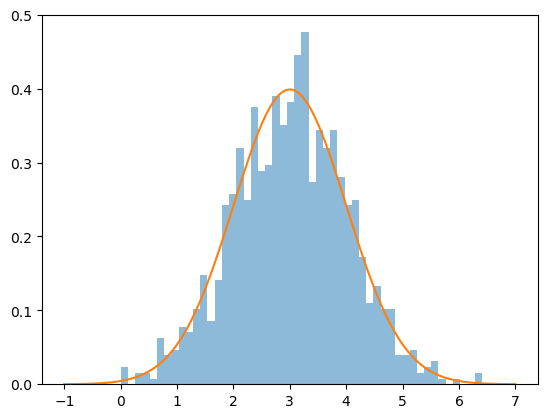

In [73]:
x = np.linspace(-1, 7, 1001)
plt.hist(muestras, bins=50, density=True, alpha=0.5, label='Histograma de muestras')
plt.plot(x, X.pdf(x), label='Distribución Normal (μ=3, σ=1)')

In [74]:
mu_mle = np.mean(muestras)
sigma_mle = np.mean((muestras - mu_mle) ** 2) ** 0.5

In [75]:
mu_mle, mu_real

(3.0157635329510337, 3)

In [76]:
sigma_mle, sigma_real

(1.0125276826099872, 1)

## 3. Parámetros de máxima verosimilitud en una distribución de Laplace


En este caso tenemos:

- Variable aleatoria $X \sim L(\mu, b)$.

- $p(x | \mu,b)=\frac{1}{2 b} \exp\left(-\frac{|x-\mu|}{b}\right)$.

Suponemos que las observaciones

$$\mathcal{D} = \{x_1, \dots, x_N\}$$

son independientes e idénticamente distribuidas.

Mostrar que los estimadores de máxima verosimilitud de $\mu$ y $b$ son:

$$\hat{\mu}_{MLE} = \text{mediana}(\mathcal{D}) \qquad \text{y} \qquad \hat{b}_{MLE} = \frac{1}{N}\sum_{j=1}^{N}|x_j-\hat{\mu}_{MLE}|.$$

Numéricamente:

In [78]:
# Instanciamos una variable aletoaria de Laplace
mu_real = 3
b_real = 1
X = stats.laplace(loc=mu_real, scale=b_real)

In [95]:
# Generamos algunos datos iid
muestras = X.rvs(size=1000)

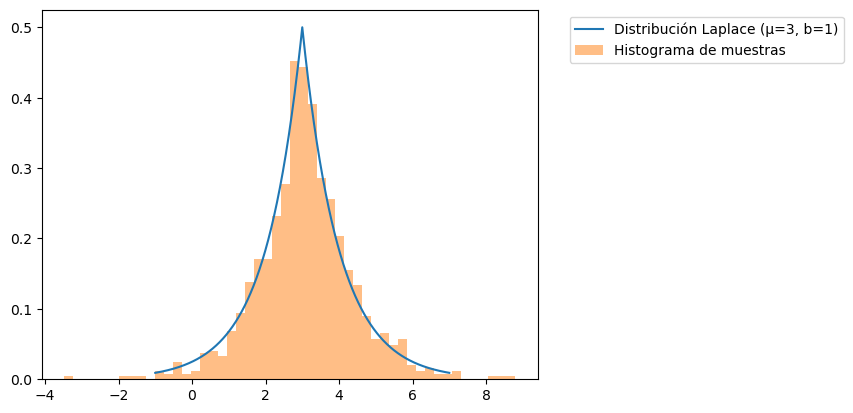

In [96]:
x = np.linspace(-1, 7, 1001)
plt.plot(x, X.pdf(x), label='Distribución Laplace (μ=3, b=1)')
plt.hist(muestras, bins=50, density=True, alpha=0.5, label='Histograma de muestras')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [97]:
# Estimadores de máxima verosimilitud
mu_mle = np.median(muestras)
b_mle = np.mean(np.abs(muestras - mu_mle))


In [98]:
# Comparamos
mu_mle, mu_real

(3.050007849823497, 3)

In [99]:
b_mle, b_real

(0.9636849064789708, 1)

## 4. Comentarios finales

El principio de máxima verosimilitud es bastante poderoso, y además una técnica general para estimar los parámetros de un modelo probabilístico. 

### Overfitting

Sin embargo, tiene un problema: **en caso de tener pocos datos de entrenamiento, podemos sobreajustar seriamente el modelo.**

### Suposición básica

El principio de máxima verosimilitud es bastante intuitivo: estimar los parámetros de manera que se maximice la probabilidad de los datos. Esto trae consigo la suposición subyacente de que los parámetros **son fijos**, de manera que la incertidumbre proviene de los datos.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>